<a href="https://colab.research.google.com/github/GustavoDasa/Atividades/blob/Modelos_de_Regressao/Question%C3%A1rio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Apresentação
---

> Este Código foi desenvolvido em Python no Google Colaboratory e seu funcionamento está a ele relacionado.

> **Para um melhor acompanhamento**, [visualize através do Colab]() utilizando os índices.



@author: GustavoDasa

---
# Bibliotecas
---

In [ ]:
import pandas as pd
import random
import numpy as np
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup as bs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

---
# Dados
---

---
## Carregando os dados:
---

In [ ]:
random.seed(42)

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Introdução à Ciência de Dados/Dados/titanic/train.csv', header=(0))
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Introdução à Ciência de Dados/Dados/titanic/test.csv', header=(0))

print("Número de linhas e colunas no conjunto de treinamento:", train.shape)
print("Número de linhas e colunas no conjunto de teste:", test.shape)

Número de linhas e colunas no conjunto de treinamento: (891, 12)
Número de linhas e colunas no conjunto de teste: (418, 11)


---
## Limpeza dos dados:
---

In [ ]:
#   Retirando dados que não serão úteis
train.drop(['PassengerId','Name', 'Ticket', 'Cabin'],axis = 1, inplace = True)

PassengerId_test = test['PassengerId']
test.drop(['PassengerId','Name', 'Ticket', 'Cabin'],axis = 1, inplace = True)


#   Preenchendo os valos nulos
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())

test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())


#   Transformação de categórico para discreto
train_original = train
train = pd.get_dummies(train)
test = pd.get_dummies(test)


#   Conversão para numpy
data_train = train.to_numpy()
nrow,ncol = data_train.shape
y_train = data_train[:,0]
X_train = data_train[:,1:ncol]

data_test = test.to_numpy()
X_test = data_test


#   Normalização
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

---
# Seleção e ajuste do modelo
---

In [ ]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = [{'n_neighbors': np.arange(1, 51),
               'metric': ['euclidean', 'minkowski','chebyshev']}]

# defining parameter range
model = GridSearchCV(estimator = knn, param_grid = param_grid, cv=10,
                    scoring='roc_auc', return_train_score=False,verbose=1)

# fitting the model for grid search
model.fit(X_train, y_train)
print(model.best_params_)
model.score(X_train, y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
{'metric': 'euclidean', 'n_neighbors': 15}


0.8991600890507995

In [ ]:
y_pred=model.predict(X_test)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-knn.csv', index = False)

---
# Classificação
---

\
Enviando a solução para o Kaggle, obtemos: 0.76315

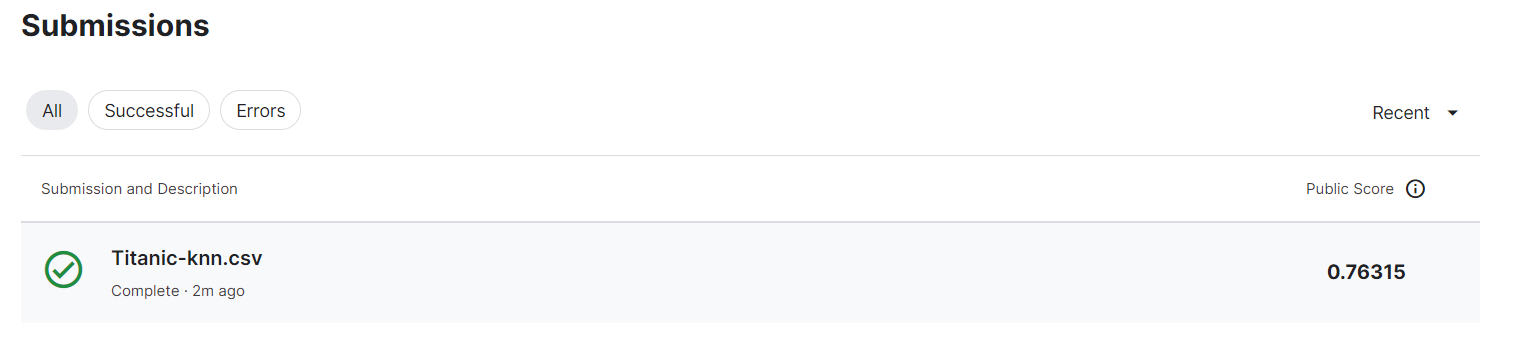